In [6]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk

# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import re
import pandas, numpy, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_PATH = './data/preprocessed_tweets.csv'

In [3]:
import ast

preprocessed_tweets = pd.read_csv(DATA_PATH, quotechar='"', sep=',', converters={5:ast.literal_eval,
                                                                                6:ast.literal_eval,
                                                                                7:ast.literal_eval,
                                                                                8:ast.literal_eval,})

preprocessed_tweets.drop('Unnamed: 0', axis=1, inplace=True)
preprocessed_tweets.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in your,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time]","[model, love, take, time]","[model, love, take, time]"
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


### Обучение и сравнение моделей

In [34]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [32]:
split_size = 31962

In [40]:
corpus_stemmed = preprocessed_tweets['tweet_stemmed'].map(' '.join)
corpus_lemmatized = preprocessed_tweets['tweet_lemmatized'].map(' '.join)

In [38]:
y = preprocessed_tweets['label'].values[:split_size]
train_df = preprocessed_tweets[['tweet_stemmed', 'tweet_lemmatized']].iloc[:split_size]

In [39]:
train_x, valid_x, train_y, valid_y = train_test_split(
    train_df, y, stratify=y)

In [43]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english')
count_vect.fit(corpus_stemmed)

xtrain_count_stem = count_vect.transform(train_x['tweet_stemmed'].map(' '.join))
xvalid_count_stem = count_vect.transform(valid_x['tweet_stemmed'].map(' '.join))

In [45]:
count_vect.fit(corpus_lemmatized)

xtrain_count_lem = count_vect.transform(train_x['tweet_lemmatized'].map(' '.join))
xvalid_count_lem = count_vect.transform(valid_x['tweet_lemmatized'].map(' '.join))

In [65]:
count_vect_limited = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english', 
                                     max_features=5000)

count_vect_limited.fit(corpus_stemmed)

xtrain_count_stem_5k = count_vect_limited.transform(train_x['tweet_stemmed'].map(' '.join))
xvalid_count_stem_5k = count_vect_limited.transform(valid_x['tweet_stemmed'].map(' '.join))

count_vect_limited.fit(corpus_lemmatized)

xtrain_count_lem_5k = count_vect_limited.transform(train_x['tweet_lemmatized'].map(' '.join))
xvalid_count_lem_5k = count_vect_limited.transform(valid_x['tweet_lemmatized'].map(' '.join))

In [67]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(corpus_stemmed)
xtrain_tfidf_stem =  tfidf_vect.transform(train_x['tweet_stemmed'].map(' '.join))
xvalid_tfidf_stem =  tfidf_vect.transform(valid_x['tweet_stemmed'].map(' '.join))

tfidf_vect.fit(corpus_lemmatized)
xtrain_tfidf_lem =  tfidf_vect.transform(train_x['tweet_lemmatized'].map(' '.join))
xvalid_tfidf_lem =  tfidf_vect.transform(valid_x['tweet_lemmatized'].map(' '.join))

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(corpus_stemmed)
xtrain_tfidf_ngram_stem =  tfidf_vect_ngram.transform(train_x['tweet_stemmed'].map(' '.join))
xvalid_tfidf_ngram_stem =  tfidf_vect_ngram.transform(valid_x['tweet_stemmed'].map(' '.join))

tfidf_vect_ngram.fit(corpus_lemmatized)
xtrain_tfidf_ngram_lem =  tfidf_vect_ngram.transform(train_x['tweet_lemmatized'].map(' '.join))
xvalid_tfidf_ngram_lem =  tfidf_vect_ngram.transform(valid_x['tweet_lemmatized'].map(' '.join))

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), 
                                         max_features=5000)
tfidf_vect_ngram_chars.fit(corpus_stemmed)
xtrain_tfidf_ngram_chars_stem =  tfidf_vect_ngram_chars.transform(train_x['tweet_stemmed'].map(' '.join)) 
xvalid_tfidf_ngram_chars_stem =  tfidf_vect_ngram_chars.transform(valid_x['tweet_stemmed'].map(' '.join))

tfidf_vect_ngram_chars.fit(corpus_lemmatized)
xtrain_tfidf_ngram_chars_lem =  tfidf_vect_ngram_chars.transform(train_x['tweet_lemmatized'].map(' '.join)) 
xvalid_tfidf_ngram_chars_lem =  tfidf_vect_ngram_chars.transform(valid_x['tweet_lemmatized'].map(' '.join))

In [61]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, thresh=0.3):
    classifier.fit(feature_vector_train, label)
    
    predictions = classifier.predict_proba(feature_vector_valid)
    predictions = (predictions[:, 1] > thresh) * 1
    
    return f1_score(predictions, valid_y)

In [68]:
# Linear Classifier на stemmed Count Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_count_stem, train_y, xvalid_count_stem)
print("LR, Stem Count Vectors: ", f1_score_)

# Linear Classifier на lemmatized Count Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_count_lem, train_y, xvalid_count_lem)
print("LR, Lem Count Vectors: ", f1_score_)

# Linear Classifier на stemmed Count Vectors с ограниченным числом фичей
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_count_stem_5k, train_y, xvalid_count_stem_5k)
print("LR, Stem Count Vectors 5k: ", f1_score_)

# Linear Classifier на lemmatized Count Vectors с ограниченным числом фичей
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_count_lem_5k, train_y, xvalid_count_lem_5k)
print("LR, Lem Count Vectors 5k: ", f1_score_)

# Linear Classifier на stemmed Word Level TF IDF Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_stem, train_y, xvalid_tfidf_stem)
print("LR, Stem WordLevel TF-IDF: ", f1_score_)

# Linear Classifier на lemmatized Word Level TF IDF Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_lem, train_y, xvalid_tfidf_lem)
print("LR, Lem WordLevel TF-IDF: ", f1_score_)

# Linear Classifier на stemmed Ngram Level TF IDF Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_stem, train_y, xvalid_tfidf_ngram_stem)
print("LR, Stem N-Gram Vectors: ", f1_score_)

# Linear Classifier на lemmatized Ngram Level TF IDF Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_lem, train_y, xvalid_tfidf_ngram_lem)
print("LR, Lem N-Gram Vectors: ", f1_score_)

# Linear Classifier на stemmed Character Level TF IDF Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars_stem, train_y, 
                        xvalid_tfidf_ngram_chars_stem)
print("LR, Stem CharLevel Vectors: ", f1_score_)

# Linear Classifier на lemmatized Character Level TF IDF Vectors
f1_score_ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars_lem, train_y, 
                        xvalid_tfidf_ngram_chars_lem)
print("LR, Lem CharLevel Vectors: ", f1_score_)

LR, Stem Count Vectors:  0.6954813359528488
LR, Lem Count Vectors:  0.6848484848484848
LR, Stem Count Vectors 5k:  0.6784313725490195
LR, Lem Count Vectors 5k:  0.6693069306930693
LR, Stem WordLevel TF-IDF:  0.6230936819172114
LR, Lem WordLevel TF-IDF:  0.6133625410733845
LR, Stem N-Gram Vectors:  0.3196480938416423
LR, Lem N-Gram Vectors:  0.3176470588235294
LR, Stem CharLevel Vectors:  0.6444906444906445
LR, Lem CharLevel Vectors:  0.6512605042016807


Лучше всего сработали count vectorizer'ы без ограничения по количеству фичей. Из tfidf лучше всех сработал character level, n-gram'ы дали очень плохой результаты.

### Облако слов

In [72]:
for line in preprocessed_tweets['clean_tweet']:
    line_words = line.split()
    print(line_words)
    break

['when', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']


In [81]:
stopwords = nltk.corpus.stopwords
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

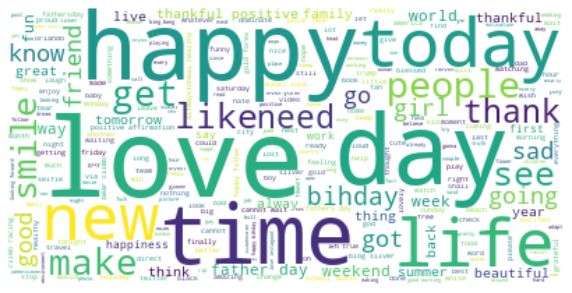

In [91]:
import collections

words = []
for line in preprocessed_tweets['clean_tweet']: 
    try:
        line_words = line.split()
        words.extend(line_words)
    except AttributeError:
        pass

wordcloud = WordCloud(background_color='white', max_words=2000, 
                      stopwords=set(stopwords.words())).generate(' '.join(word for word in words))
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

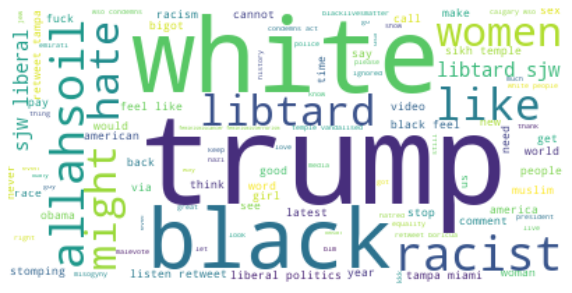

In [92]:
words = []
for line in preprocessed_tweets.loc[preprocessed_tweets['label'] == 1, 'clean_tweet']: 
    try:
        line_words = line.split()
        words.extend(line_words)
    except AttributeError:
        pass

wordcloud = WordCloud(background_color='white', max_words=2000, 
                      stopwords=set(stopwords.words())).generate(' '.join(word for word in words))
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

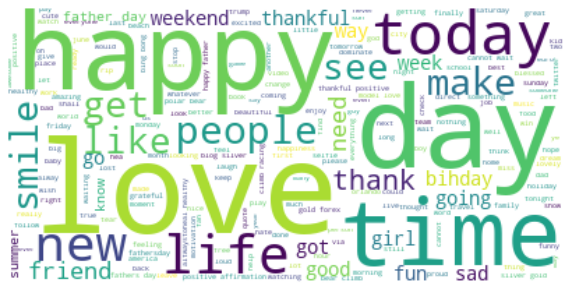

In [93]:
words = []
for line in preprocessed_tweets.loc[preprocessed_tweets['label'] == 0, 'clean_tweet']: 
    try:
        line_words = line.split()
        words.extend(line_words)
    except AttributeError:
        pass

wordcloud = WordCloud(background_color='white', max_words=2000, 
                      stopwords=set(stopwords.words())).generate(' '.join(word for word in words))
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()